# Capacitated Vehicle Routing Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rnd = np.random
rnd.seed(4)

In [3]:
n = 10 # number of clients
xc = rnd.rand(n+1)*200  # n for client and one extra for depot
yc = rnd.rand(n+1)*100

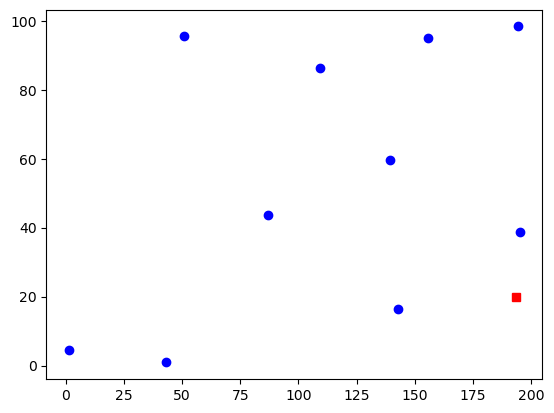

In [4]:
plt.plot(xc[0],yc[0],c='r',marker='s')   # color red, marker square
plt.scatter(xc[1:],yc[1:],c='b')  # color blue

In [5]:
N = [i for i in range(1,n+1)]   # list of clients
V = [0] + N   # union of o and list
A = [(i,j) for i in V for j in V if i!=j]  # sort of arcs
c = {(i,j): np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for i,j in A}  # user to calculate hypotenuse for the right angled triangle, given its side and perpendicular
Q = 20  # capacity of vehicle
q = {i: rnd.randint(1,10) for i in N}  # demand of each customer

In [6]:
# modelling

from gurobipy import Model, GRB, quicksum

In [7]:
mdl = Model('CVRP')

Restricted license - for non-production use only - expires 2024-10-28


In [8]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)  # for clients

In [9]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A))   # sum of distances

In [10]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)==1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if i!=j)==1 for j in N);
mdl.addConstrs((x[i,j]==1) >> (u[i]+q[i]==u[j]) 
              for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i]>=q[i] for i in N);
mdl.addConstrs(u[i]<=Q for i in N);

In [11]:
mdl.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 5 5600H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x754c04c9
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 162 rows and 4 columns
Presolve time: 0.01s
Presolved: 202 rows, 124 columns, 1265 nonzeros
Variable types: 34 continuous, 90 integer (90 binary)
Found heuristic solution: objective 1522.5235964

Root relaxation: objective 5.585816e+02, 71 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 

Downwards the gap is reducing gurobi is trying to minimize the gap of our bounds, the idea is to get both bounds equal to get optimal solution

We can add constraints for our model like to stop after 30 sec or gap is less than 10% using following codes:

mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30

In [12]:
active_arcs = [a for a in A if x[a].x>0.99]

In [13]:
active_arcs

[(0, 6),
 (0, 9),
 (1, 0),
 (2, 10),
 (3, 0),
 (4, 3),
 (5, 7),
 (6, 2),
 (7, 8),
 (8, 1),
 (9, 5),
 (10, 4)]

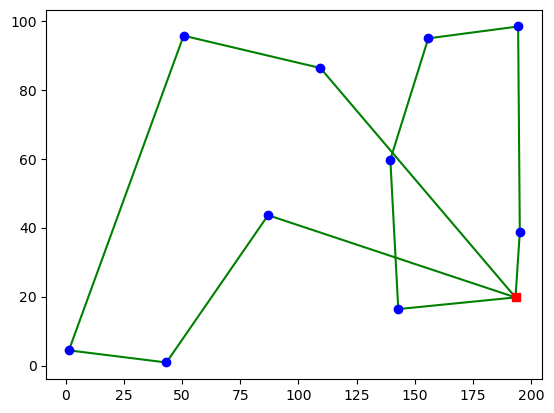

In [14]:
for i,j in active_arcs:
    plt.plot([xc[i],xc[j]],[yc[i],yc[j]],c='g',zorder=0)
plt.plot(xc[0],yc[0],c='r',marker='s')   # color red, marker square
plt.scatter(xc[1:],yc[1:],c='b')  # color blue
